In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
colab_path = 'ScadaData.txt'
local_path = 'C:\\Users\\hanna\\Desktop\\data\\ScadaData.txt'

scada_data = pd.read_csv(local_path, delimiter='\t',  parse_dates=True)
scada_data['dtTimeStamp'] = pd.to_datetime(scada_data['dtTimeStamp'])

turbine_names = scada_data['intObjectId'].unique()[0:4]
print(turbine_names)
print("Number of turbines: " + str(len(turbine_names)))

[1748 1749 1750 1751]
Number of turbines: 4


       WindDirectionMean    intObjectId
count      235816.000000  237195.000000
mean          185.336724    1761.148148
std           105.440429       8.040211
min             0.000000    1748.000000
25%            83.500000    1754.000000
50%           199.100000    1761.000000
75%           272.900000    1768.000000
max           359.000000    1776.000000


Text(0.5, 1.0, 'Raw Data')

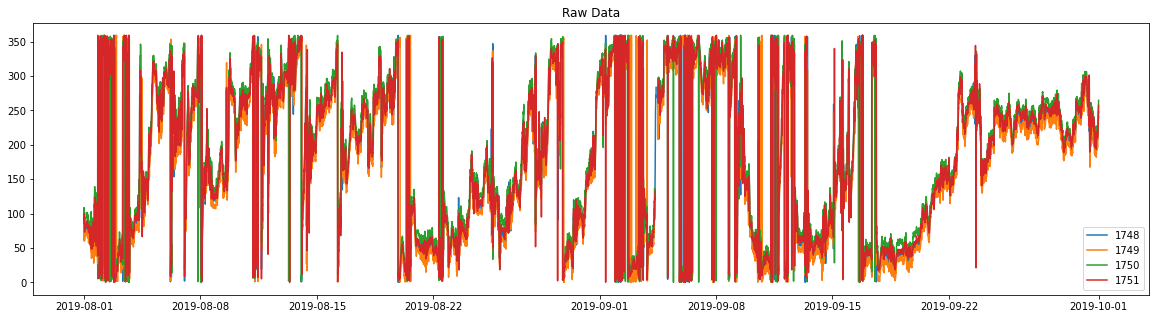

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline


wind_direction_data = scada_data[['dtTimeStamp','WindDirectionMean', 'intObjectId']]
wind_direction_data['dtTimeStamp'] = pd.to_datetime(scada_data['dtTimeStamp'])
wind_direction_data.index=wind_direction_data['dtTimeStamp']
print(wind_direction_data.describe())

plt.figure(figsize=(20,5))
for turbine in turbine_names:
    plt.plot(wind_direction_data[wind_direction_data['intObjectId'] == turbine]["WindDirectionMean"], label=turbine)
plt.legend(loc='best')
plt.title('Raw Data')

In [5]:
from statsmodels.tsa.arima_model import ARIMA
import datetime as dt

def forecast_wind_direction(data, n_steps, train_test_split, samples_count):
    n_step = n_steps
    X = data[0:samples_count]
    size = int(len(X) * train_test_split)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train.values]
    predictions = list()
    test_indices = [i for i in range(0, len(test.values)) if i%n_step==0]
    for i in test_indices:
        model = ARIMA(history, order=(1,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast(n_step)
        yhat = output[0].flatten()
        predictions.extend(yhat)
        history.extend(test.values[i:i+n_step])
    
    return predictions


samples_to_use = 2000
train_test_split = 0.04
n_steps = 1
filtered = wind_direction_data[wind_direction_data['intObjectId'].isin(turbine_names)]
averaged = filtered[['WindDirectionMean', 'intObjectId']].groupby('dtTimeStamp').mean()[['WindDirectionMean']]
predictions_df = pd.DataFrame(index=averaged[int(samples_to_use * train_test_split):samples_to_use].index)
average_mean_wind_directions_real = averaged[0:samples_to_use]

for turbine in turbine_names:
    print('starting turbine: ' + str(turbine))
    data = wind_direction_data[wind_direction_data['intObjectId'] == turbine]["WindDirectionMean"]  
    predictions = forecast_wind_direction(data, n_steps, train_test_split, samples_to_use)
    predictions_df[turbine] = predictions
    print('finished turbine: ' + str(turbine))
    
print(predictions_df)


starting turbine: 1748


C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


finished turbine: 1748
starting turbine: 1749


C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


finished turbine: 1749
starting turbine: 1750


C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


finished turbine: 1750
starting turbine: 1751


C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


finished turbine: 1751
                           1748        1749        1750        1751
dtTimeStamp                                                        
2019-08-01 13:20:00   66.509665   57.263684   73.052919   72.608481
2019-08-01 13:30:00   69.722781   56.662047   84.241446   81.436702
2019-08-01 13:40:00   67.425445   55.918228   88.413779   86.564045
2019-08-01 13:50:00   51.345821   50.713562   90.262822   80.984714
2019-08-01 14:00:00   44.828777   52.162823   89.948230   79.493096
...                         ...         ...         ...         ...
2019-08-14 20:30:00  201.343736  189.340309  212.988923  202.808708
2019-08-14 20:40:00  198.450739  187.499168  210.800248  199.564707
2019-08-14 20:50:00  195.421878  185.483094  209.084953  196.926355
2019-08-14 21:00:00  193.873025  184.973449  208.640538  196.532794
2019-08-14 21:10:00  195.140099  187.511046  209.954508  198.814401

[1920 rows x 4 columns]


In [6]:
predictions_df.head(5)

,1748,1749,1750,1751
dtTimeStamp,,,,
2019-08-01 13:20:00,66.509665,57.263684,73.052919,72.608481
2019-08-01 13:30:00,69.722781,56.662047,84.241446,81.436702
2019-08-01 13:40:00,67.425445,55.918228,88.413779,86.564045
2019-08-01 13:50:00,51.345821,50.713562,90.262822,80.984714
2019-08-01 14:00:00,44.828777,52.162823,89.948230,79.493096


In [7]:
average_mean_wind_directions_predictions = predictions_df.mean(axis=1)
print(average_mean_wind_directions_predictions)

dtTimeStamp
2019-08-01 13:20:00     67.358687
2019-08-01 13:30:00     73.015744
2019-08-01 13:40:00     74.580374
2019-08-01 13:50:00     68.326730
2019-08-01 14:00:00     66.608232
                          ...    
2019-08-14 20:30:00    201.620419
2019-08-14 20:40:00    199.078715
2019-08-14 20:50:00    196.729070
2019-08-14 21:00:00    196.004951
2019-08-14 21:10:00    197.855014
Length: 1920, dtype: float64


In [8]:
print(average_mean_wind_directions_real)

                     WindDirectionMean
dtTimeStamp                           
2019-08-01 00:00:00             83.750
2019-08-01 00:10:00             96.925
2019-08-01 00:20:00             90.550
2019-08-01 00:30:00             77.425
2019-08-01 00:40:00             74.050
...                                ...
2019-08-14 20:30:00            198.400
2019-08-14 20:40:00            195.800
2019-08-14 20:50:00            196.000
2019-08-14 21:00:00            198.575
2019-08-14 21:10:00            197.950

[2000 rows x 1 columns]


In [9]:
combined_df = pd.concat([average_mean_wind_directions_predictions, average_mean_wind_directions_real], axis=1)
print(combined_df)

                              0  WindDirectionMean
dtTimeStamp                                       
2019-08-01 00:00:00         NaN             83.750
2019-08-01 00:10:00         NaN             96.925
2019-08-01 00:20:00         NaN             90.550
2019-08-01 00:30:00         NaN             77.425
2019-08-01 00:40:00         NaN             74.050
...                         ...                ...
2019-08-14 20:30:00  201.620419            198.400
2019-08-14 20:40:00  199.078715            195.800
2019-08-14 20:50:00  196.729070            196.000
2019-08-14 21:00:00  196.004951            198.575
2019-08-14 21:10:00  197.855014            197.950

[2000 rows x 2 columns]


Text(0.5, 1.0, 'Real vs Predictions')

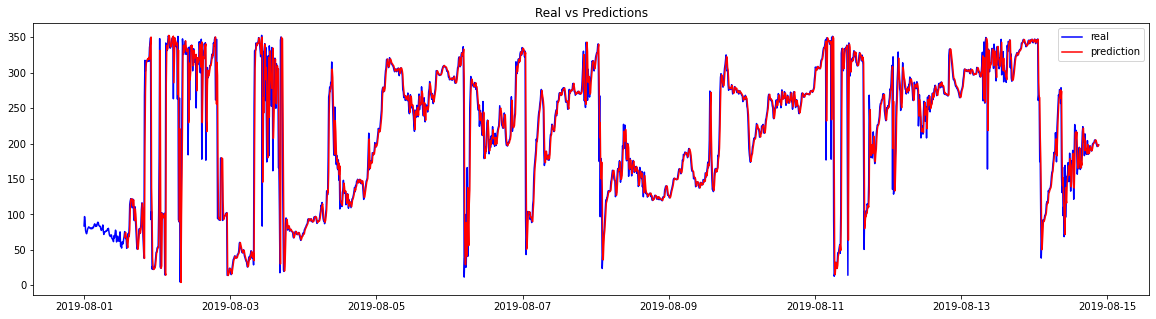

In [10]:
plt.figure(figsize=(20,5))
plt.plot(combined_df['WindDirectionMean'], color='blue', label='real')
plt.plot(combined_df[0], color='red', label='prediction')
plt.legend(loc='best')
plt.title('Real vs Predictions')

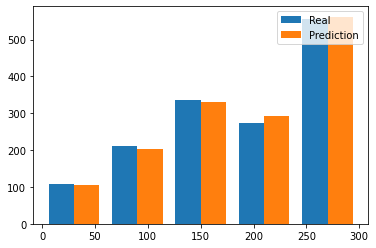

In [12]:
combined_df = combined_df.dropna()

plt.hist([combined_df['WindDirectionMean'], combined_df[0]], bins=list(range(0,360, 60)), label=['Real', 'Prediction'])
plt.legend(loc='upper right')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(combined_df['WindDirectionMean'], combined_df[0])
print('Test MSE: %.3f' % error)

Test MSE: 1363.345
